In [1]:
import numpy as np
import util

mat = np.load("conf_mat.npy")

In [2]:
print mat
print mat.shape
print util.CLASSES.keys()

[[179833    411    479     82    131     74     43     19     10     43]
 [  1760   2879    388    108     17     21     33      0      9      2]
 [  1382    126   1911     13      2      3      7      0      0      0]
 [   757    231    123    375     17     22     39      0      9      5]
 [   386     13      2      1    440     12     13      0      5      1]
 [   204     14     11     23      7    146      4      0      0     19]
 [   166     20      8      8     34      2    102      0      1      0]
 [    57      0      0      0      0      0      0    257      0      0]
 [   135     42     31     30      6     11      3      0     37      1]
 [   182      1      1      9      8      7      0      0      0     60]]
(10, 10)
['AM-PRT', 'AM-MNR', 'AM-PRD', 'R-AM-CAU', 'C-AM-CAU', 'C-AM-PNC', 'AM-REC', 'AM-TMP', 'C-AM-DIR', 'C-AM-DIS', 'AM-PNC', 'AM-LOC', 'AM-TM', 'R-AM-LOC', 'AM-CAU', 'C-AM-NEG', 'R-AM-PNC', 'AM-ADV', 'C-AM-ADV', 'R-A4', 'R-A0', 'R-A1', 'R-A2', 'R-A3', 'C-AM-MNR', 

Confusion matrix, without normalization
[[179833    411    479     82    131     74     43     19     10     43]
 [  1760   2879    388    108     17     21     33      0      9      2]
 [  1382    126   1911     13      2      3      7      0      0      0]
 [   757    231    123    375     17     22     39      0      9      5]
 [   386     13      2      1    440     12     13      0      5      1]
 [   204     14     11     23      7    146      4      0      0     19]
 [   166     20      8      8     34      2    102      0      1      0]
 [    57      0      0      0      0      0      0    257      0      0]
 [   135     42     31     30      6     11      3      0     37      1]
 [   182      1      1      9      8      7      0      0      0     60]]
Normalized confusion matrix
[[9.92866805e-01 2.26915114e-03 2.64458247e-03 4.52726018e-04
  7.23257419e-04 4.08557626e-04 2.37405107e-04 1.04899931e-04
  5.52104900e-05 2.37405107e-04]
 [3.37358635e-01 5.51849722e-01 7.43722446e-

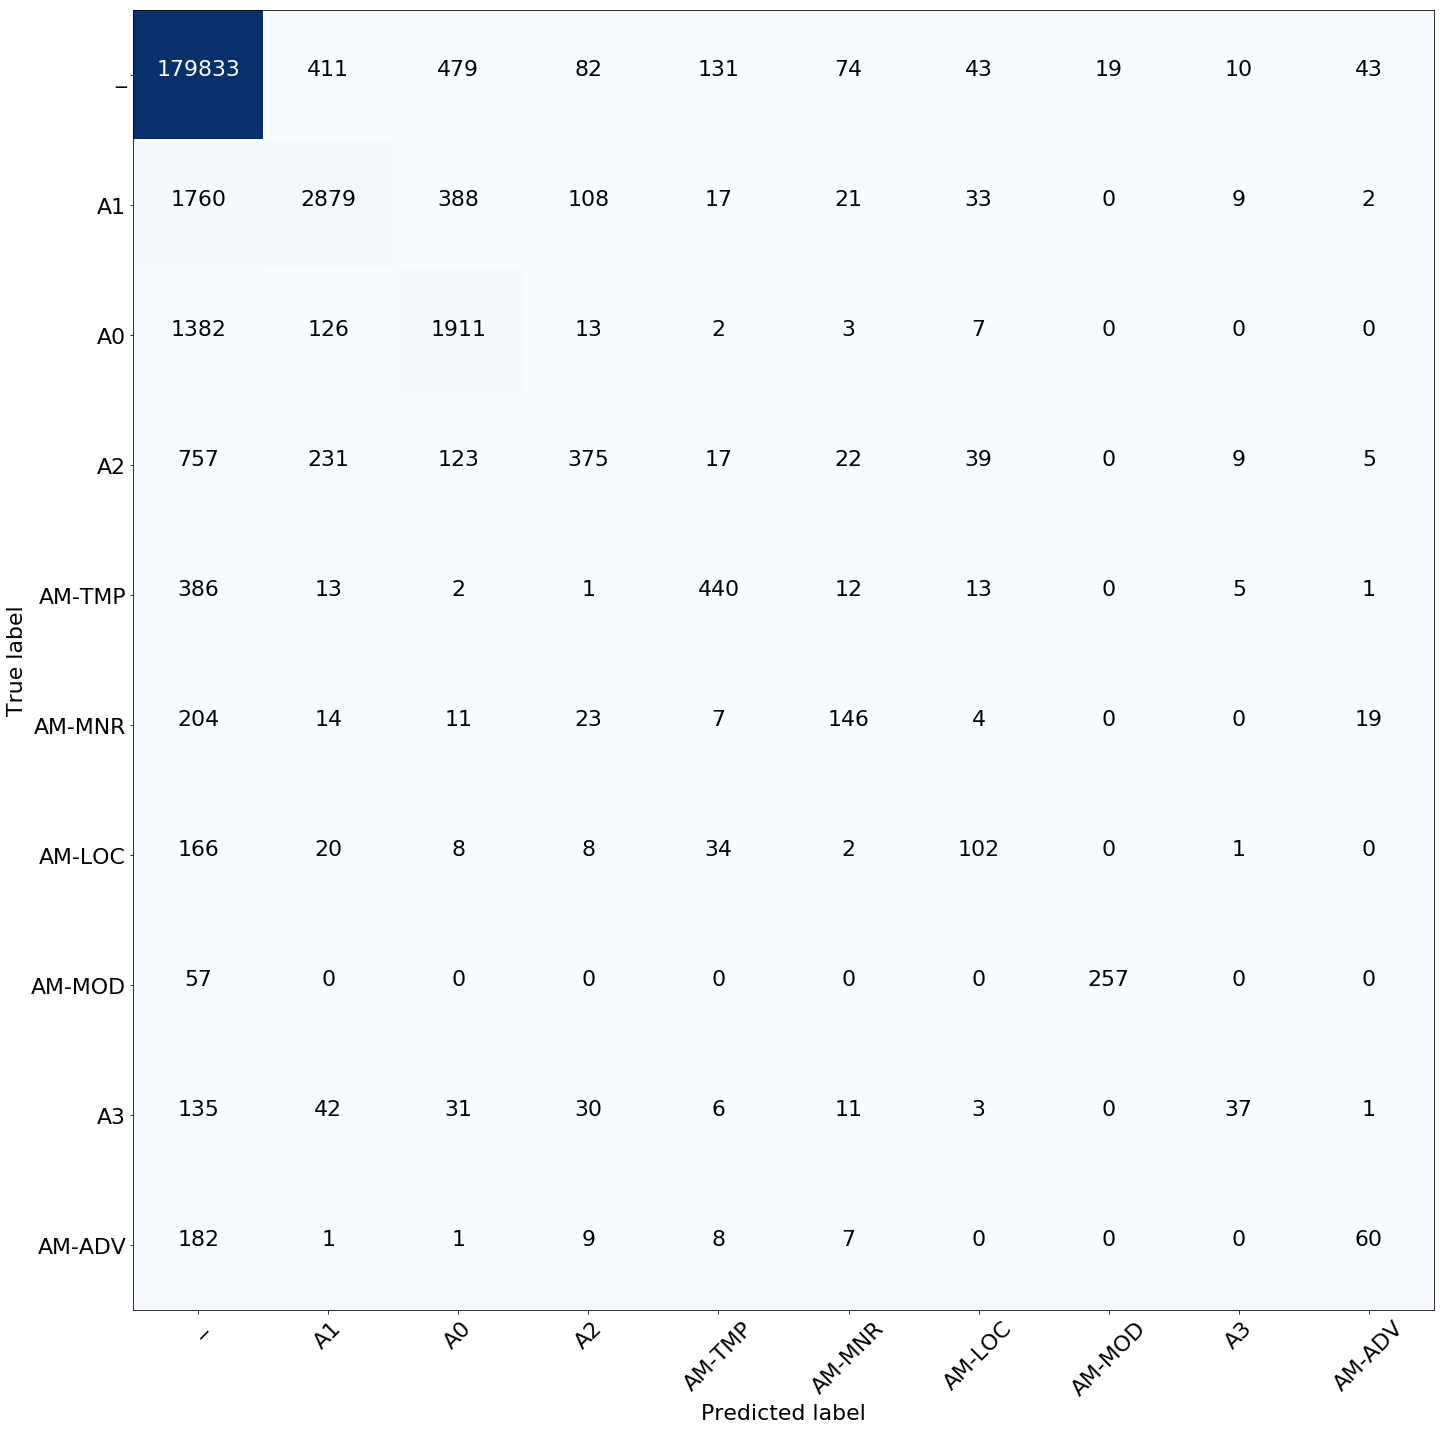

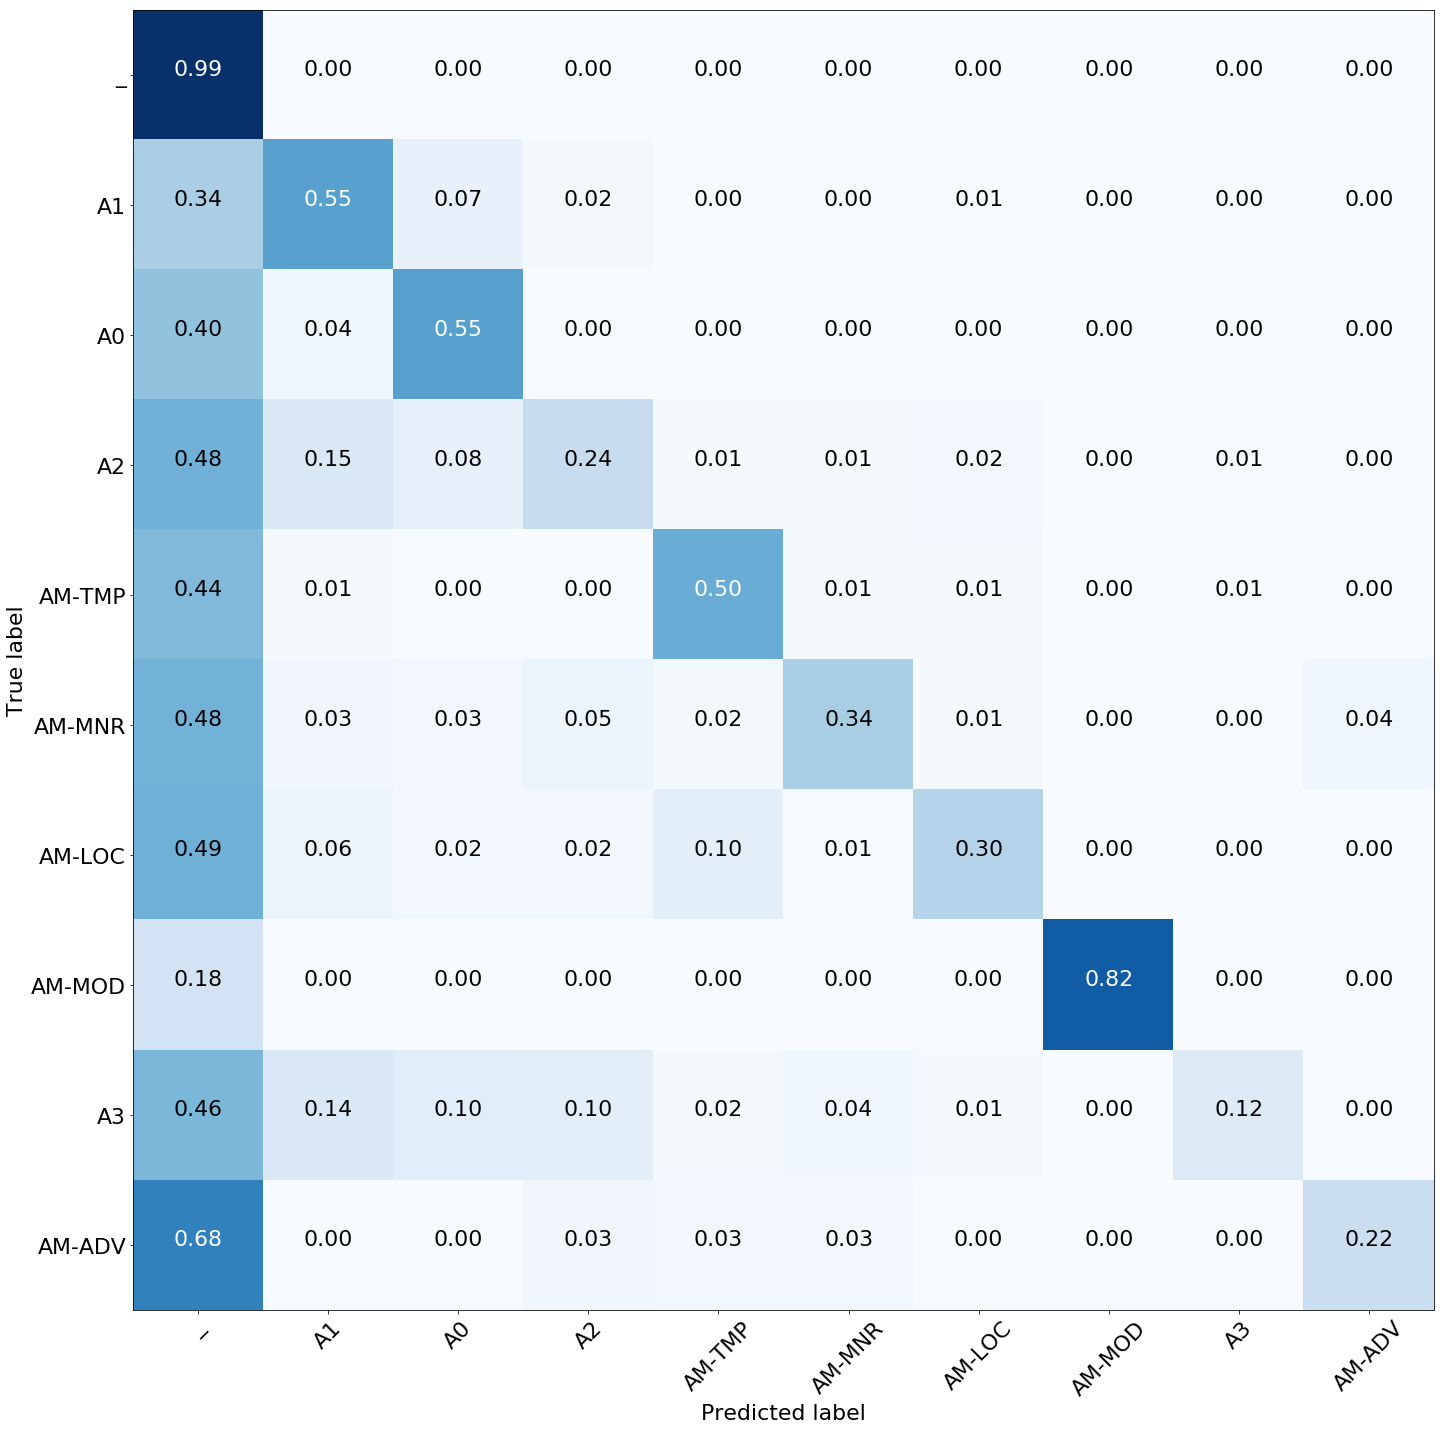

In [12]:
import itertools
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['_', 'A1', 'A0', 'A2', 'AM-TMP', 'AM-MNR', 'AM-LOC', 'AM-MOD', 'A3', 'AM-ADV']
matplotlib.rcParams.update({'font.size': 22})

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(30, 20))
plot_confusion_matrix(mat, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig("report/figures/fig2.png")
# Plot normalized confusion matrix
plt.figure(figsize=(30, 20))
plot_confusion_matrix(mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("report/figures/fig3.png")
plt.show()